## Importing Dependencies

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
from google.colab import files
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')

In [ ]:
def import_dataset():
  for _ in range(5):
    uploaded = files.upload()
  income_data = pd.read_csv('income_data.csv')
  user_data = pd.read_csv('user_data.csv')
  task_data = pd.read_csv('task_data.csv')
  log_data = pd.read_csv('log_data.csv')
  assignment_data = pd.read_csv('assignment_data.csv')
  return income_data, user_data, task_data, log_data, assignment_data

In [ ]:
income_data, user_data, task_data, log_data, assignment_data = import_dataset()

Saving income_data.csv to income_data.csv


Saving task_data.csv to task_data.csv


Saving user_data.csv to user_data.csv


Saving assignment_data.csv to assignment_data.csv


Saving log_data.csv to log_data.csv


In [ ]:
income_data.head()

,Unnamed: 0,project_id,uid,date,income
0,0,1246,1458049517,2022-12-25T00:00:00.000Z,0.03
1,1,1246,1703905621,2022-10-30T00:00:00.000Z,0.03
2,2,1246,1714073899,2022-11-27T00:00:00.000Z,0.03
3,3,2151,1458049517,2022-12-19T00:00:00.000Z,0.02
4,4,2338,1458049517,2022-12-25T00:00:00.000Z,0.06


In [ ]:
income_data.shape

(1335, 5)

In [ ]:
task_data.head()

,Unnamed: 0,project_id,pool_id,title,description,pool_startedAt,hasInstructions,mayContainAdultContent,requesterID,requesterTrusted,lang,grade,averageAcceptanceTimeSec,moneyAvgHourly,moneyMed,moneyTop10,moneyMax3,reward
0,0,0,0,title,NaN,2022-09-16T22:16:48.000Z,0,1,requesterID,1,EN,4.30,NaN,0.54,NaN,NaN,NaN,0.0
1,1,2338,36616149,Ekran görüntüsünde yetişkin içerik var mı?,"Bu, ""Ekran görüntüsünde yetişkin içerik var mı...",2022-11-29T12:19:54.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.52,NaN,0.00,0.00,0.09,1.19,0.0
2,2,2338,36760808,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-08T22:27:28.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.54,NaN,0.00,0.00,0.29,1.69,0.0
3,3,2338,36774752,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-09T21:50:47.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.51,NaN,0.00,0.00,0.09,1.19,0.0
4,4,6795,21626385,Тональность сообщений из социальных сетей,Разметка сообщений по эмоциональной окраске.,2022-10-23T22:24:44.000Z,1,1,81029b6e4b04badacad20d15ff3998e0,1,NaN,4.89,NaN,2.40,0.04,0.14,NaN,0.0


In [ ]:
task_data.shape

(628, 18)

In [ ]:
user_data.head()

,Unnamed: 0,uid,country,language,birthdate,joined
0,0,1316040758,EG,"AR,EN,",1984-03-11T00:00:00.000Z,2021-01-13T00:00:00.000Z
1,1,1429235843,KE,"EN,KI,SW,",1993-03-01T00:00:00.000Z,2021-05-27T00:00:00.000Z
2,2,1430094402,PK,"DE,EN,ES,ID,PT,RU,",1989-09-24T00:00:00.000Z,2021-05-29T00:00:00.000Z
3,3,1458049517,TR,"DE,EN,FR,RU,TR,",1996-12-16T00:00:00.000Z,2021-07-27T00:00:00.000Z
4,4,1490584733,ID,"EN,ID,",1982-03-13T00:00:00.000Z,2021-09-29T00:00:00.000Z


In [ ]:
user_data.shape

(21, 6)

In [ ]:
assignment_data.head()

,Unnamed: 0,uid,project_id
0,0,1316040758,49390
1,1,1316040758,54170
2,2,1316040758,73686
3,3,1316040758,80759
4,4,1316040758,81112


In [ ]:
assignment_data.shape

(1053, 3)

In [ ]:
log_data.head()

,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
0,0,232,1699065816,TABUPDATED,1668886726463,https://toloka.yandex.com/signup,48,0.0,0.0,0.0,0.0,0.0
1,1,233,1699065816,WEBREQUEST,1668886726797,https://toloka.yandex.com/signup,48,NaN,NaN,NaN,NaN,NaN
2,2,234,1699065816,TABUPDATED,1668886727665,https://toloka.yandex.com/,48,0.0,0.0,0.0,0.0,0.0
3,3,235,1699065816,WEBREQUEST,1668886727848,https://toloka.yandex.com/,48,NaN,NaN,NaN,NaN,NaN
4,4,236,1699065816,TABUPDATED,1668886728408,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0


In [ ]:
log_data.shape

(152945, 12)

In [ ]:
user_history = pd.merge(income_data[['uid','project_id']], task_data[['title','project_id']], how='inner', on = 'project_id')

In [ ]:
user_history.head()

,uid,project_id,title
0,1458049517,2338,Ekran görüntüsünde yetişkin içerik var mı?
1,1458049517,2338,Ekran görüntüsünde yetişkin içerik var mı?
2,1458049517,2338,Ekran görüntüsünde yetişkin içerik var mı?
3,1714073899,7053,Яндекс Маркет. Редиректы. Категория. Точность
4,1458049517,7738,Eğitim: Yetişkin içeriğe sahip dosyaların ekra...


In [ ]:
user_history.shape

(1794, 3)

## Exploratory Data Analysis

### Splitting Training and Testing Data

In [ ]:
assignment_data_train, assignment_data_test = train_test_split(assignment_data, test_size=0.2)

In [ ]:
assignment_data_train.shape

(842, 3)

In [ ]:
assignment_data_test.shape

(211, 3)

In [ ]:
user_history_train, user_history_test = train_test_split(user_history, test_size=0.2)

In [ ]:
user_history_train.shape

(1435, 3)

In [ ]:
user_history_test.shape

(359, 3)

In [ ]:
user_data_train, user_data_test = train_test_split(user_data, test_size=0.2)

In [ ]:
user_data_train.shape

(16, 6)

In [ ]:
user_data_test.shape

(5, 6)

## Listing down all the training data records



In [ ]:
assignment_data_train.head()

,Unnamed: 0,uid,project_id
28,28,1429235843,113684
191,191,1648608319,77011
860,860,1714073899,54170
327,327,1675921760,121214
525,525,1706440161,101216


In [ ]:
user_history_train.head()

,uid,project_id,title
1679,1706440161,121647,Is the PRODUCT suitable for the INTEREST?
884,1429235843,89409,Classification of images
1788,1648608319,123529,Participate in our Web-Plugin Survey!
778,1703905621,86873,Identify Valid Coupon Codes (FR)
1383,1684019585,107801,Generic Scenario Testing Extension (English: U...


In [ ]:
user_data_train.head()

,Unnamed: 0,uid,country,language,birthdate,joined
3,3,1458049517,TR,"DE,EN,FR,RU,TR,",1996-12-16T00:00:00.000Z,2021-07-27T00:00:00.000Z
4,4,1490584733,ID,"EN,ID,",1982-03-13T00:00:00.000Z,2021-09-29T00:00:00.000Z
19,19,1725201772,US,"EN,ES,",2002-03-16T00:00:00.000Z,2022-12-08T00:00:00.000Z
17,17,1718146027,US,"EN,",1994-01-15T00:00:00.000Z,2022-11-24T00:00:00.000Z
0,0,1316040758,EG,"AR,EN,",1984-03-11T00:00:00.000Z,2021-01-13T00:00:00.000Z


In [ ]:
task_data.head()

,Unnamed: 0,project_id,pool_id,title,description,pool_startedAt,hasInstructions,mayContainAdultContent,requesterID,requesterTrusted,lang,grade,averageAcceptanceTimeSec,moneyAvgHourly,moneyMed,moneyTop10,moneyMax3,reward
0,0,0,0,title,NaN,2022-09-16T22:16:48.000Z,0,1,requesterID,1,EN,4.30,NaN,0.54,NaN,NaN,NaN,0.0
1,1,2338,36616149,Ekran görüntüsünde yetişkin içerik var mı?,"Bu, ""Ekran görüntüsünde yetişkin içerik var mı...",2022-11-29T12:19:54.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.52,NaN,0.00,0.00,0.09,1.19,0.0
2,2,2338,36760808,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-08T22:27:28.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.54,NaN,0.00,0.00,0.29,1.69,0.0
3,3,2338,36774752,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-09T21:50:47.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.51,NaN,0.00,0.00,0.09,1.19,0.0
4,4,6795,21626385,Тональность сообщений из социальных сетей,Разметка сообщений по эмоциональной окраске.,2022-10-23T22:24:44.000Z,1,1,81029b6e4b04badacad20d15ff3998e0,1,NaN,4.89,NaN,2.40,0.04,0.14,NaN,0.0


## EDA for Tasks based on their language information

Since there are a lot of Nan values in 'lang' column in task data, so we are going to reassign that column by detecting the languages uding langdetect library

In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=94813a987eded9fe726d7295631e8fa45ca84e0278be893ab6747e025da64e05
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
from langdetect import detect
task_data['language'] = task_data['title'].apply(detect)

In [ ]:
df1 = task_data.groupby(['language']).size().reset_index(name='Languagewise').sort_values('Languagewise',
                                                                             ascending=False).head()
df1.head()

,language,Languagewise
6,en,321
17,ru,180
9,fr,23
7,es,21
13,mk,19


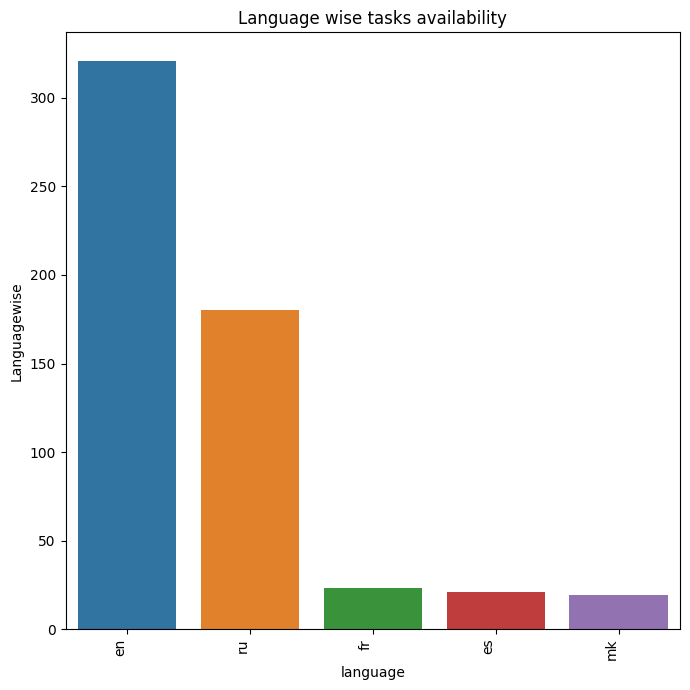

In [ ]:
plt.figure(figsize=(7, 7))
ax = sns.barplot(x="language", y="Languagewise", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Language wise tasks availability')
plt.tight_layout()
plt.show()

## EDA for worker profiles based on the language they speak

Since a worker can know multiple languages, that is why to make the grouping easier, we are going to create multiple entries for a worker each corresponding to a language they speak.

In [ ]:
user_data.head()

,Unnamed: 0,uid,country,language,birthdate,joined
0,0,1316040758,EG,"AR,EN,",1984-03-11T00:00:00.000Z,2021-01-13T00:00:00.000Z
1,1,1429235843,KE,"EN,KI,SW,",1993-03-01T00:00:00.000Z,2021-05-27T00:00:00.000Z
2,2,1430094402,PK,"DE,EN,ES,ID,PT,RU,",1989-09-24T00:00:00.000Z,2021-05-29T00:00:00.000Z
3,3,1458049517,TR,"DE,EN,FR,RU,TR,",1996-12-16T00:00:00.000Z,2021-07-27T00:00:00.000Z
4,4,1490584733,ID,"EN,ID,",1982-03-13T00:00:00.000Z,2021-09-29T00:00:00.000Z


In [ ]:
def split_lang(a):
  my_list = a.split(",")
  new_list = my_list[:-1]
  return new_list
  
user_data['lang'] = user_data['language'].apply(split_lang)

In [ ]:
user_data.head()

,Unnamed: 0,uid,country,language,birthdate,joined,lang
0,0,1316040758,EG,"AR,EN,",1984-03-11T00:00:00.000Z,2021-01-13T00:00:00.000Z,"[AR, EN]"
1,1,1429235843,KE,"EN,KI,SW,",1993-03-01T00:00:00.000Z,2021-05-27T00:00:00.000Z,"[EN, KI, SW]"
2,2,1430094402,PK,"DE,EN,ES,ID,PT,RU,",1989-09-24T00:00:00.000Z,2021-05-29T00:00:00.000Z,"[DE, EN, ES, ID, PT, RU]"
3,3,1458049517,TR,"DE,EN,FR,RU,TR,",1996-12-16T00:00:00.000Z,2021-07-27T00:00:00.000Z,"[DE, EN, FR, RU, TR]"
4,4,1490584733,ID,"EN,ID,",1982-03-13T00:00:00.000Z,2021-09-29T00:00:00.000Z,"[EN, ID]"


In [ ]:
users = user_data.explode('lang')

In [ ]:
users.head()

,Unnamed: 0,uid,country,language,birthdate,joined,lang
0,0,1316040758,EG,"AR,EN,",1984-03-11T00:00:00.000Z,2021-01-13T00:00:00.000Z,AR
0,0,1316040758,EG,"AR,EN,",1984-03-11T00:00:00.000Z,2021-01-13T00:00:00.000Z,EN
1,1,1429235843,KE,"EN,KI,SW,",1993-03-01T00:00:00.000Z,2021-05-27T00:00:00.000Z,EN
1,1,1429235843,KE,"EN,KI,SW,",1993-03-01T00:00:00.000Z,2021-05-27T00:00:00.000Z,KI
1,1,1429235843,KE,"EN,KI,SW,",1993-03-01T00:00:00.000Z,2021-05-27T00:00:00.000Z,SW


In [ ]:
users_train, users_test = train_test_split(users, test_size=0.2)

In [ ]:
users_train_langwise = users_train.groupby(['lang']).size().reset_index(
    name='Languagewise').sort_values('Languagewise',ascending=False)

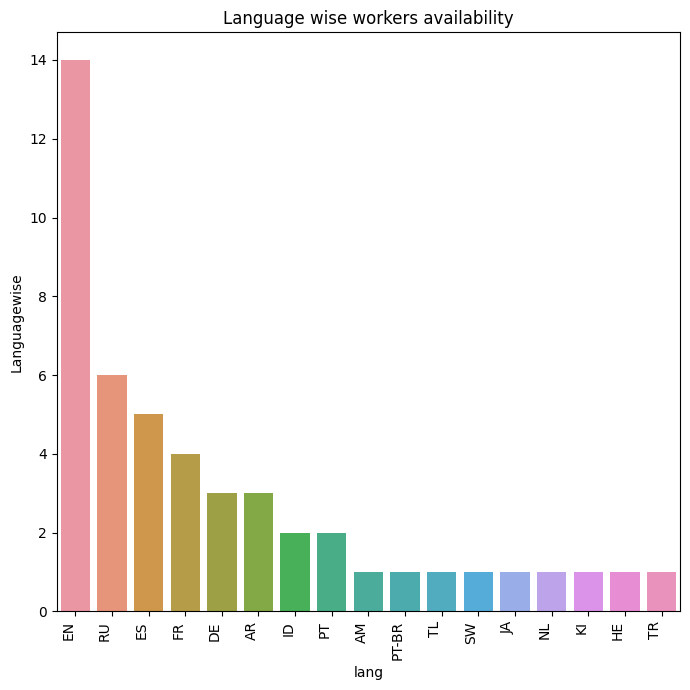

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x="lang", y="Languagewise",data=users_train_langwise)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Language wise workers availability')
plt.tight_layout()
plt.show()